In [ ]:
#Importing All The Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MaxAbsScaler,MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeRegressor
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import statsmodels.api as sm
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from joblib import load,dump
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
DF=pd.read_csv('Final_Data.csv')#Reading The CSV File
print("Shape of the DataFrame is",DF.shape)#Printing The Shape of The DataFrame
DF=DF[['Gender','Race (Reported)','Age','Height (cm)','Weight (kg)','Diabetes','Simvastatin (Zocor)','Amiodarone (Cordarone)','Estimated Target INR Range Based on Indication','INR on Reported Therapeutic Dose of Warfarin','Cyp2C9 genotypes','VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T','Therapeutic Dose of Warfarin']]

Shape of the DataFrame is (5102, 38)


<ipython-input-3-b99e89413aa4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(DF[i], shade=True)


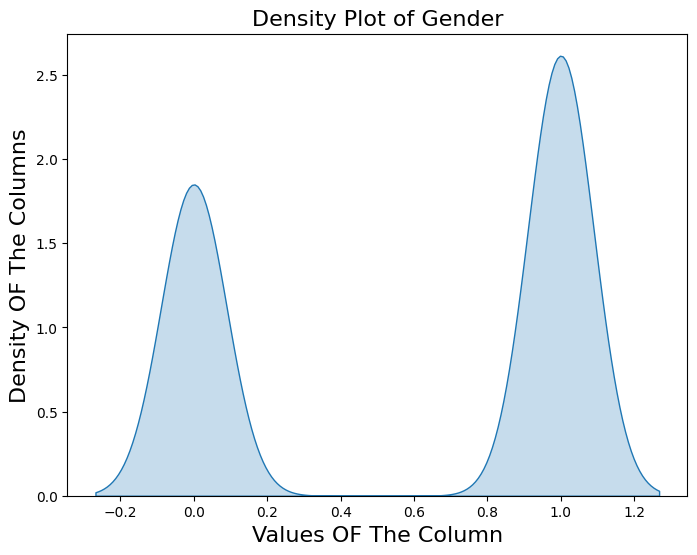

<ipython-input-3-b99e89413aa4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(DF[i], shade=True)


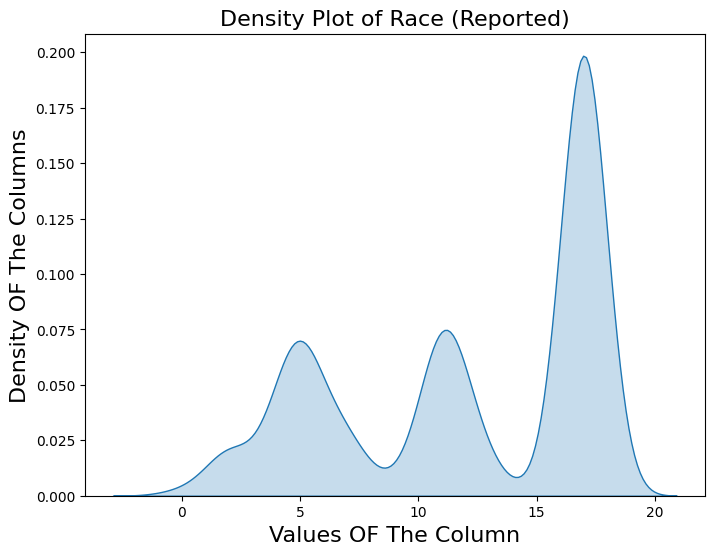

<ipython-input-3-b99e89413aa4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(DF[i], shade=True)


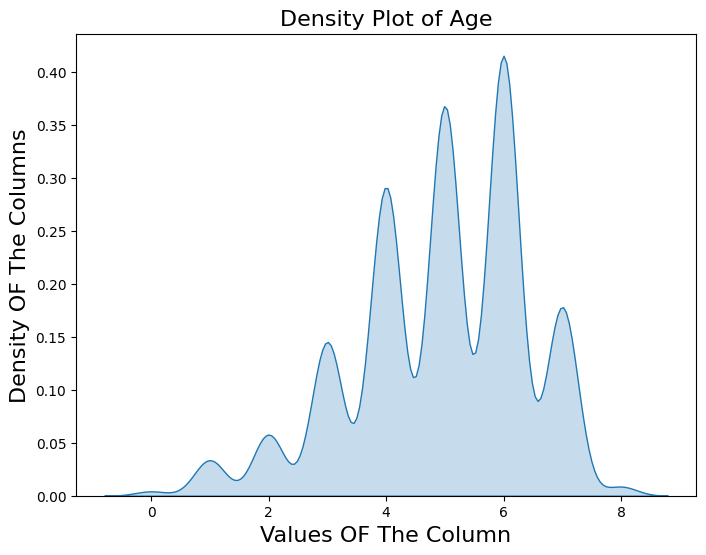

<ipython-input-3-b99e89413aa4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(DF[i], shade=True)


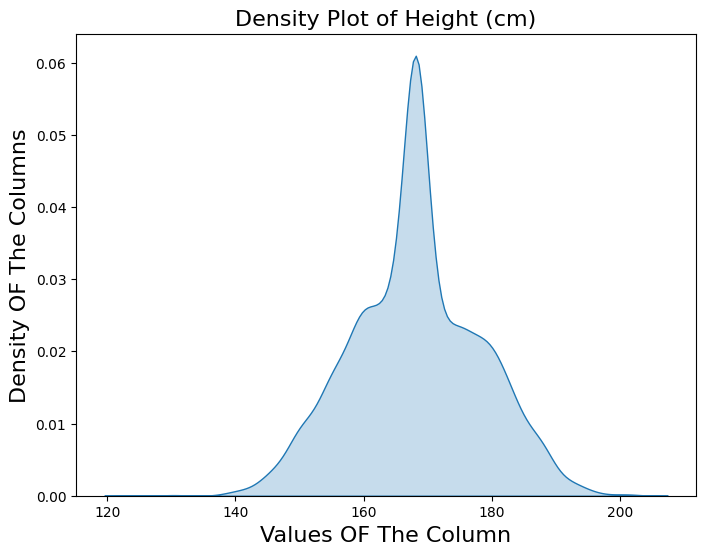

<ipython-input-3-b99e89413aa4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(DF[i], shade=True)


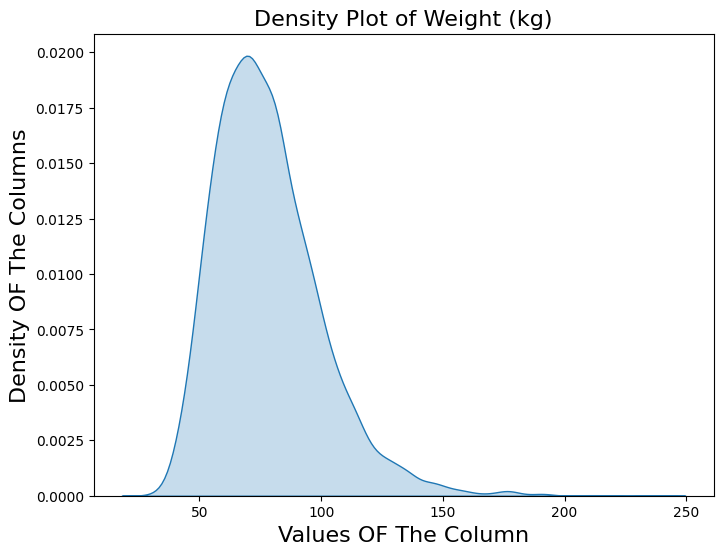

<ipython-input-3-b99e89413aa4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(DF[i], shade=True)


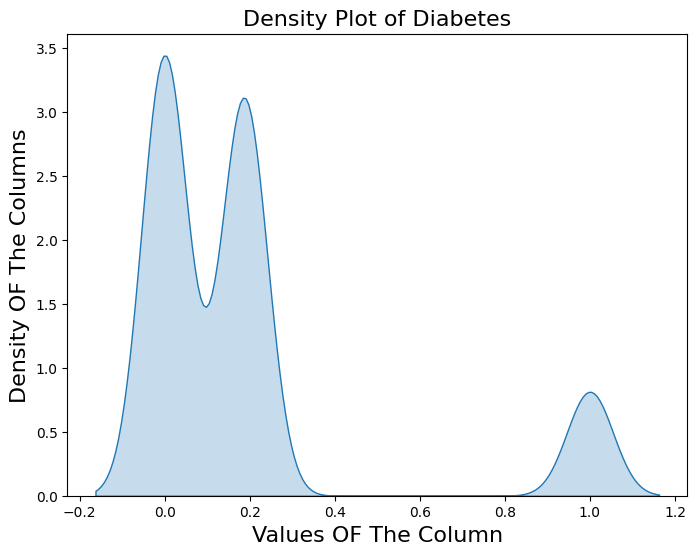

<ipython-input-3-b99e89413aa4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(DF[i], shade=True)


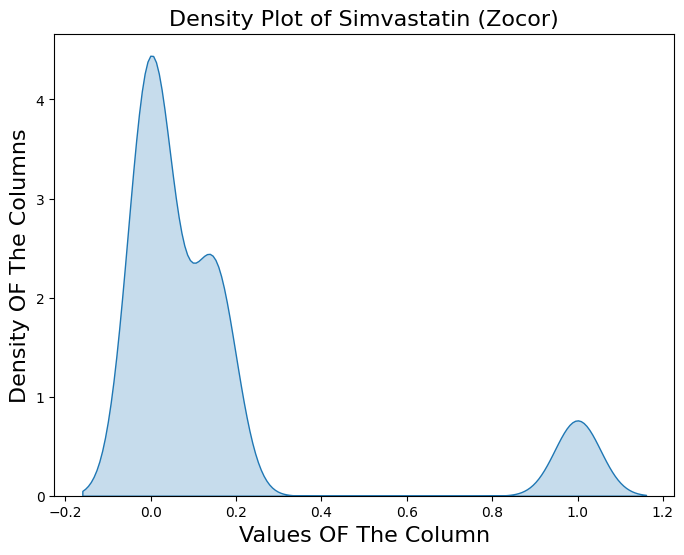

<ipython-input-3-b99e89413aa4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(DF[i], shade=True)


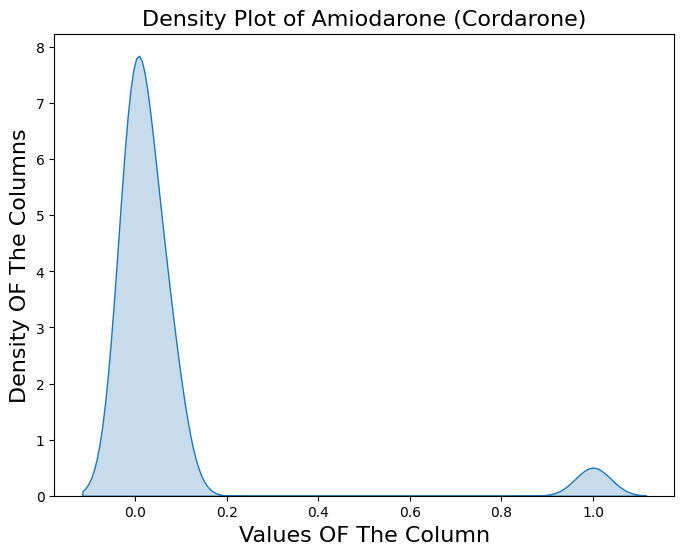

<ipython-input-3-b99e89413aa4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(DF[i], shade=True)


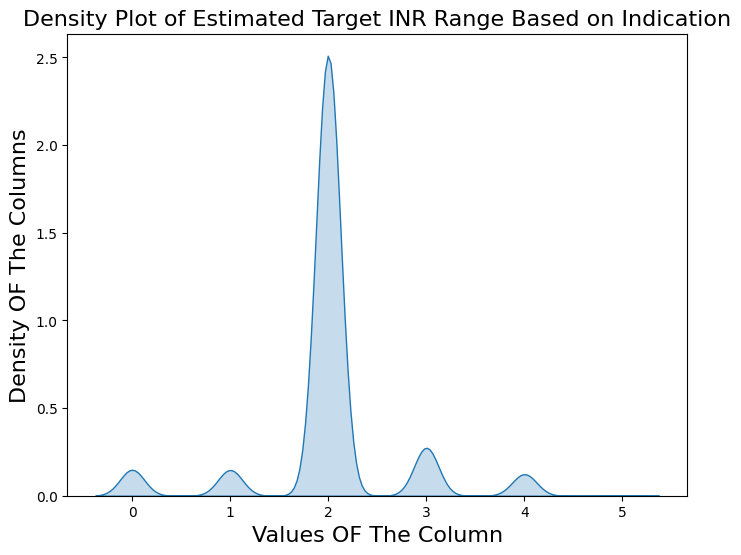

<ipython-input-3-b99e89413aa4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(DF[i], shade=True)


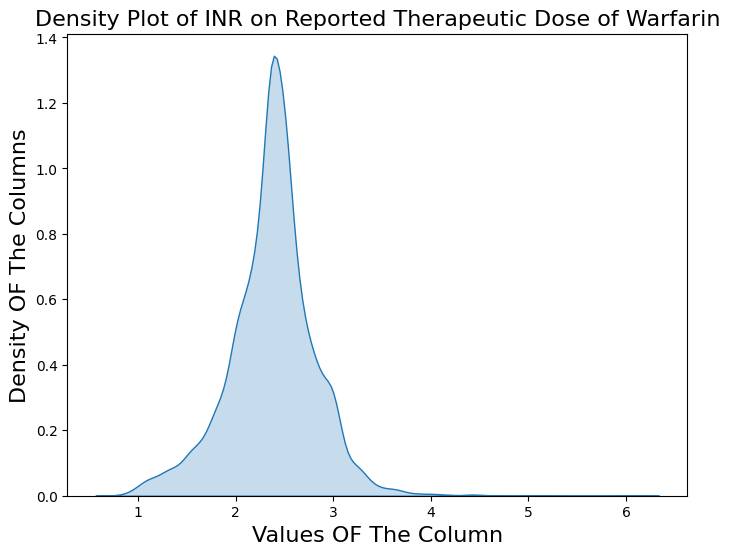

<ipython-input-3-b99e89413aa4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(DF[i], shade=True)


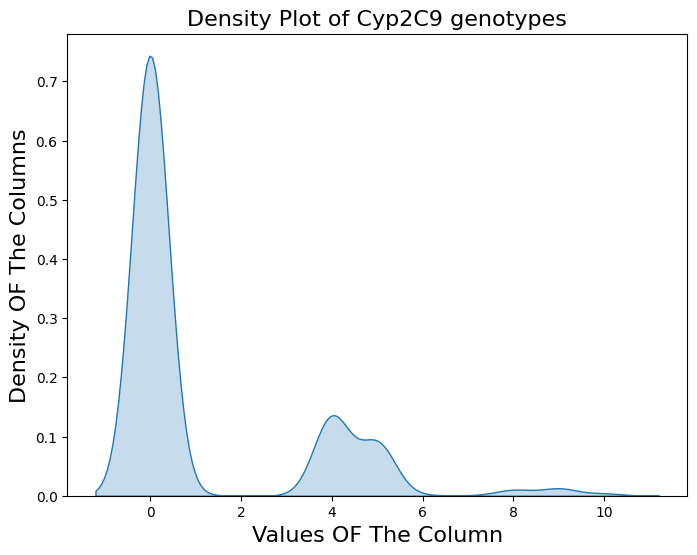

<ipython-input-3-b99e89413aa4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(DF[i], shade=True)


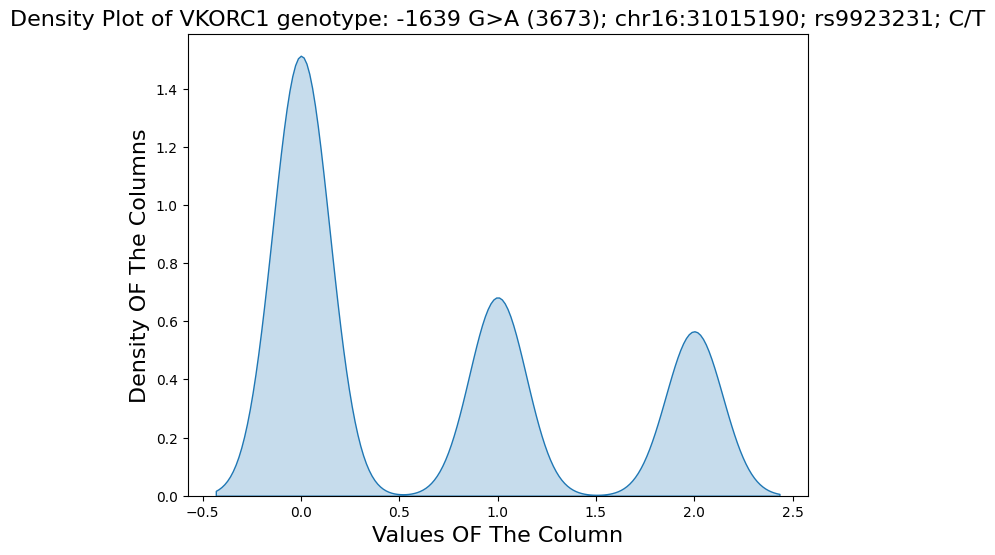

<ipython-input-3-b99e89413aa4>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(DF[i], shade=True)


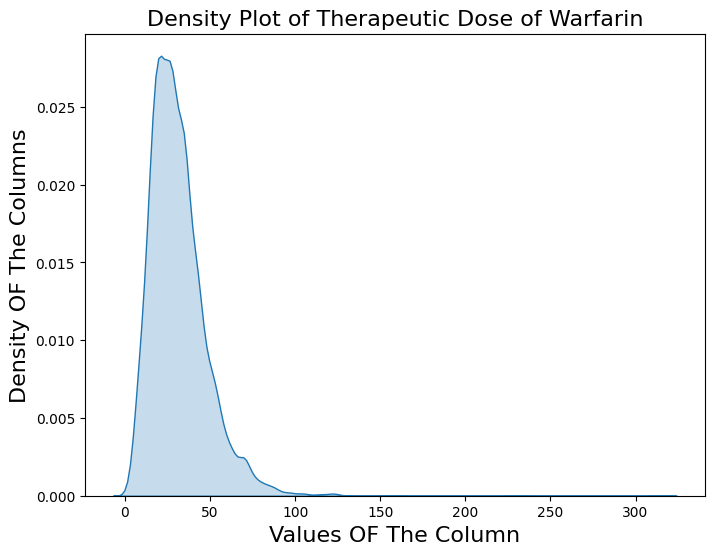

In [ ]:
#Printing The Density Plot OF All Columns
for i in DF.columns:
  plt.figure(figsize=(8, 6))
  sns.kdeplot(DF[i], shade=True)
  plt.title("Density Plot of "+i, fontsize=16)
  plt.xlabel("Values OF The Column", fontsize=16)
  plt.ylabel("Density OF The Columns", fontsize=16)
  plt.show()

In [ ]:
DF.describe()#Describing The Whole Table

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Estimated Target INR Range Based on Indication,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T,Therapeutic Dose of Warfarin
count,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.00000,5102.000000,5102.000000,5102.000000,5102.000000
mean,0.585653,12.125833,4.925127,168.115923,78.003072,0.189504,0.147267,0.065783,2.02450,2.369878,1.208938,0.656801,31.280462
std,0.492657,5.355454,1.466037,9.968783,21.979613,0.299028,0.294764,0.212707,0.68649,0.439535,2.218034,0.796983,16.807067
min,0.000000,0.000000,0.000000,124.968000,30.000000,0.000000,0.000000,0.000000,0.00000,0.800000,0.000000,0.000000,2.100000
25%,0.000000,7.000000,4.000000,162.000000,62.000000,0.000000,0.000000,0.000000,2.00000,2.140000,0.000000,0.000000,20.000000
50%,1.000000,13.000000,5.000000,168.047778,75.000000,0.187024,0.000000,0.000000,2.00000,2.364438,0.000000,0.000000,28.000000
75%,1.000000,17.000000,6.000000,175.006000,90.000000,0.187024,0.146335,0.066236,2.00000,2.600000,0.000000,1.000000,39.522500
max,1.000000,18.000000,8.000000,202.000000,237.700000,1.000000,1.000000,1.000000,5.00000,6.100000,10.000000,2.000000,315.000000


In [ ]:
DF.info()#Priniting The Information Of The Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5102 entries, 0 to 5101
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Gender                                                             5102 non-null   int64  
 1   Race (Reported)                                                    5102 non-null   int64  
 2   Age                                                                5102 non-null   int64  
 3   Height (cm)                                                        5102 non-null   float64
 4   Weight (kg)                                                        5102 non-null   float64
 5   Diabetes                                                           5102 non-null   float64
 6   Simvastatin (Zocor)                                                5102 non-null   float64
 7   Amiodarone (Cordarone)  

In [ ]:
#Creating A X And Y Set and Separating Training Testing And Validation Set
X,Y=DF.drop("Therapeutic Dose of Warfarin",axis=1),DF['Therapeutic Dose of Warfarin']
Columns=X.columns
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,train_size=0.80,shuffle=True,random_state=10)#Splitting X And Y as X_Train,X_Test
# Scaling_Object=StandardScaler()
# X_Train=Scaling_Object.fit_transform(X_Train)
X_Validation=X_Train[0:round(X_Train.shape[0]*30/100)]#Creating A Validation Set
Y_Validation=Y_Train[0:round(X_Train.shape[0]*30/100)]
X_Train=X_Train[round(X_Train.shape[0]*30/100):]
Y_Train=Y_Train[round(Y_Train.shape[0]*30/100):]

In [ ]:
#Performing Regression Analysis
model = sm.OLS(Y, X).fit()
print(model.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Therapeutic Dose of Warfarin   R-squared (uncentered):                   0.854
Model:                                      OLS   Adj. R-squared (uncentered):              0.854
Method:                           Least Squares   F-statistic:                              2485.
Date:                          Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                                  03:17:41   Log-Likelihood:                         -20540.
No. Observations:                          5102   AIC:                                  4.110e+04
Df Residuals:                              5090   BIC:                                  4.118e+04
Df Model:                                    12                                                  
Covariance Type:                      nonrobust                                                  
                    

In [ ]:
Columns=X.columns#Creating Into DataFrame Again
X_Train=pd.DataFrame(X_Train,columns=Columns)
X_Validation=pd.DataFrame(X_Validation,columns=Columns)
X_Test=pd.DataFrame(X_Test,columns=Columns)

In [ ]:
#Printing The Shape of Training and Test and Validation for X
print(X_Train.shape)
print(X_Test.shape)
print(X_Validation.shape)

(2857, 12)
(1021, 12)
(1224, 12)


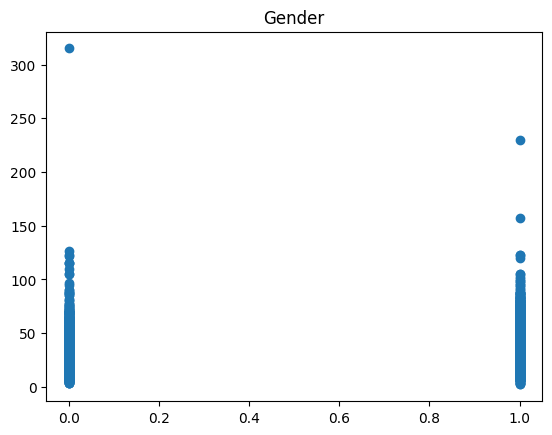

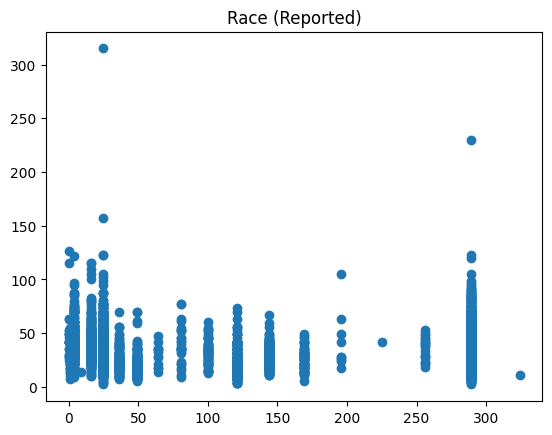

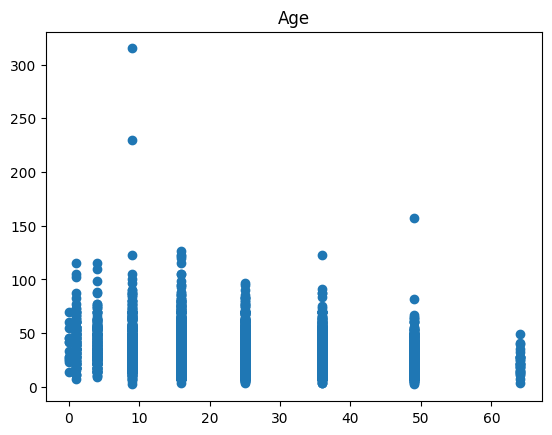

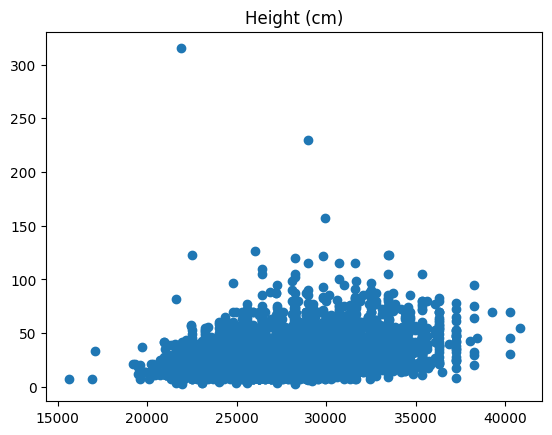

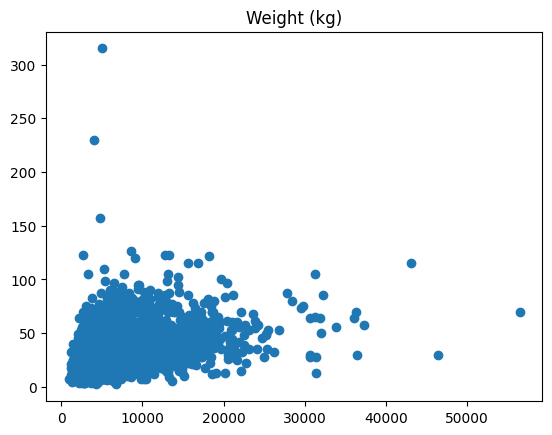

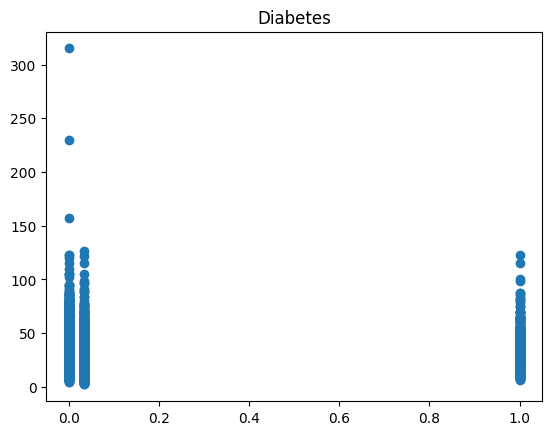

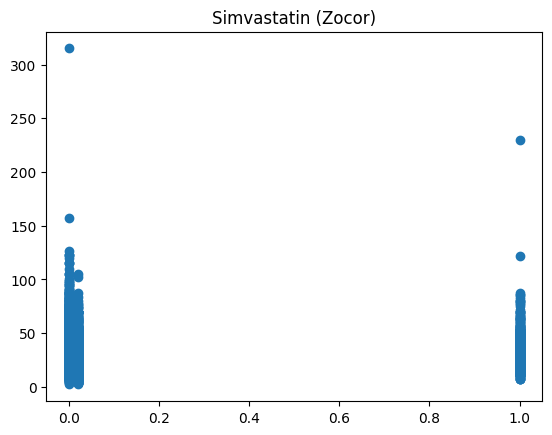

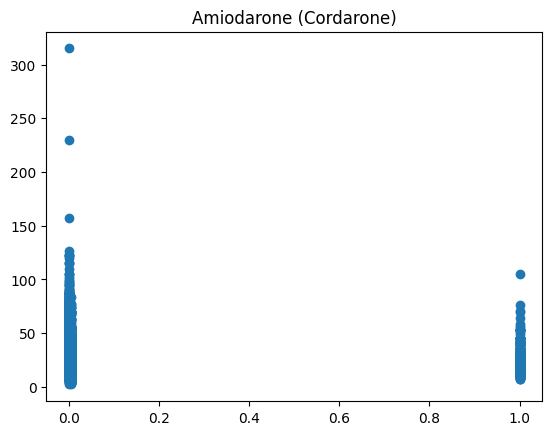

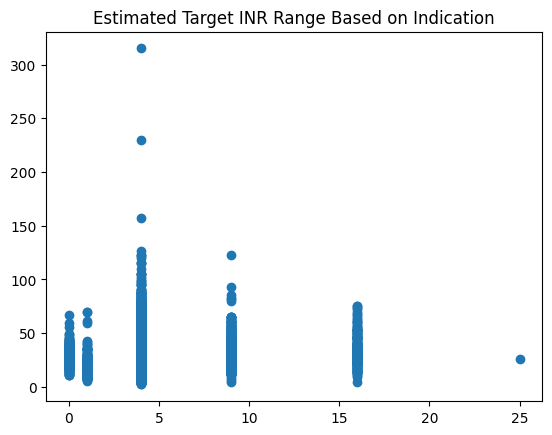

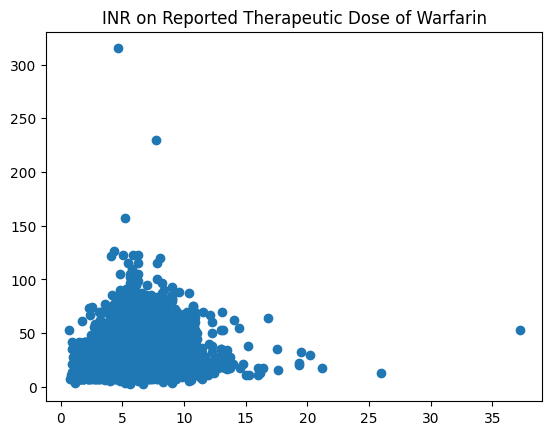

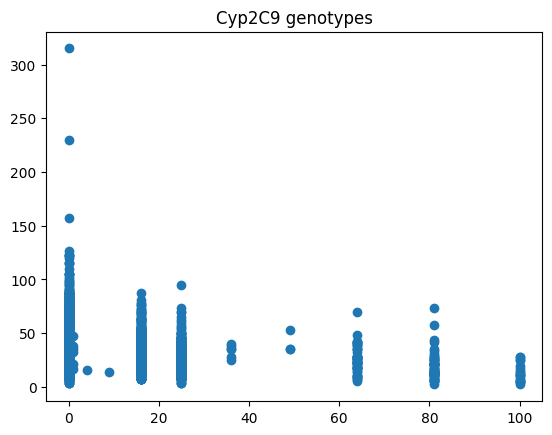

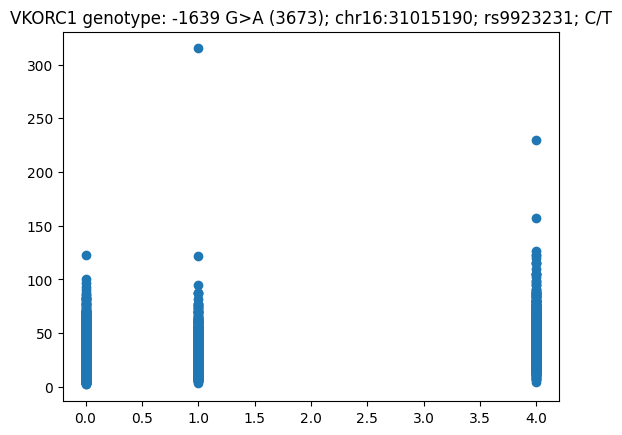

In [ ]:
#Creating Scatter Plot For Every Column Of X with respect To Y
for _ in X.columns:
  plt.title(_)
  plt.scatter(X[_]**2,Y)
  plt.show()

In [ ]:
X_Train

,Gender,Race (Reported),Age,Height (cm),Weight (kg),Diabetes,Simvastatin (Zocor),Amiodarone (Cordarone),Estimated Target INR Range Based on Indication,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T
4606,1,17,4,180.0098,84.0,0.000000,0.000000,1.000000,2,2.600000,4,2
250,1,17,7,175.2600,102.5,0.187024,0.000000,0.000000,2,2.900000,4,2
4574,1,17,3,180.0098,64.0,0.000000,0.000000,0.000000,2,2.500000,0,2
3856,1,5,5,171.9834,92.5,0.000000,1.000000,0.000000,2,2.590000,0,1
2084,1,17,5,164.0840,79.0,0.187024,0.146335,0.066236,2,2.364438,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1180,1,11,5,168.9100,73.0,0.187024,0.146335,0.066236,2,1.260000,0,0
3441,0,4,4,160.0200,72.7,0.000000,0.000000,0.000000,2,2.500000,0,2
1344,1,7,5,175.0060,57.0,1.000000,0.000000,0.000000,1,1.900000,0,1
4623,1,17,4,167.0050,87.0,0.000000,0.000000,0.000000,2,2.500000,0,2


In [ ]:
#Training The Linear Regression Model Without Feature Selection
#Without Feature Selection
Model=LinearRegression()
Model.fit(X_Train,Y_Train)
Y_Validation_Predict=Model.predict(X_Validation)
Y_Train_Predict=Model.predict(X_Train)
print("R2 Score For The Validation Set",r2_score(Y_Validation,Y_Validation_Predict))
print("R2 Score For The Training Set",r2_score(Y_Train,Y_Train_Predict))

R2 Score For The Validation Set 0.36131900611953804
R2 Score For The Training Set 0.36249880681565894


In [ ]:
#Doing The Feature Selection
sel=SelectKBest(score_func=f_classif,k=10).fit(X_Train,Y_Train)
sel.get_support()

array([False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True])

In [ ]:
#Getting The Column That ARe Best Suited For The Model
columns=X_Train.columns[sel.get_support()]
X_Train=sel.transform(X_Train)
X_Test=sel.transform(X_Test)
X_Train=pd.DataFrame(X_Train,columns=columns)
X_Test=pd.DataFrame(X_Test,columns=columns)
X_Validation=sel.transform(X_Validation)
X_Validation=pd.DataFrame(X_Validation,columns=columns)

In [ ]:
#With Feature Reduction  Printing The r2 score to see that the score is not reduced eventhough we have reduce d the features
Model=LinearRegression()
Model.fit(X_Train,Y_Train)
Y_Validation_Predict=Model.predict(X_Validation)
Y_Train_Predict=Model.predict(X_Train)
print("R2 Score For The Validation Set",r2_score(Y_Validation,Y_Validation_Predict))
print("R2 Score For The Training Set",r2_score(Y_Train,Y_Train_Predict))

R2 Score For The Validation Set 0.3565292037770009
R2 Score For The Training Set 0.3574105621780176


In [ ]:
#After Selecting Top 10 Features
X_Train

,Race (Reported),Age,Height (cm),Weight (kg),Simvastatin (Zocor),Amiodarone (Cordarone),Estimated Target INR Range Based on Indication,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T
0,17.0,4.0,180.0098,84.0,0.000000,1.000000,2.0,2.600000,4.0,2.0
1,17.0,7.0,175.2600,102.5,0.000000,0.000000,2.0,2.900000,4.0,2.0
2,17.0,3.0,180.0098,64.0,0.000000,0.000000,2.0,2.500000,0.0,2.0
3,5.0,5.0,171.9834,92.5,1.000000,0.000000,2.0,2.590000,0.0,1.0
4,17.0,5.0,164.0840,79.0,0.146335,0.066236,2.0,2.364438,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2852,11.0,5.0,168.9100,73.0,0.146335,0.066236,2.0,1.260000,0.0,0.0
2853,4.0,4.0,160.0200,72.7,0.000000,0.000000,2.0,2.500000,0.0,2.0
2854,7.0,5.0,175.0060,57.0,0.000000,0.000000,1.0,1.900000,0.0,1.0
2855,17.0,4.0,167.0050,87.0,0.000000,0.000000,2.0,2.500000,0.0,2.0


In [ ]:
#Removing Multicolinearity if Exist in the dataset
corr_matrix = X_Train.corr()
columns = corr_matrix.columns

columns_to_drop = []

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))
columns_to_drop=set(columns_to_drop)

0


In [ ]:
X_Train=X_Train.drop(columns_to_drop,axis=1)
X_Test=X_Test.drop(columns_to_drop,axis=1)
X_Validation=X_Validation.drop(columns_to_drop,axis=1)
print(X_Train.shape)
print(X_Test.shape)
print(X_Validation.shape)

(2857, 10)
(1021, 10)
(1224, 10)


In [ ]:
X_Validation

,Race (Reported),Age,Height (cm),Weight (kg),Simvastatin (Zocor),Amiodarone (Cordarone),Estimated Target INR Range Based on Indication,INR on Reported Therapeutic Dose of Warfarin,Cyp2C9 genotypes,VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T
0,11.0,5.0,161.036000,70.0,0.146335,0.066236,2.0,2.364438,0.0,1.0
1,17.0,6.0,169.926000,77.2,0.146335,0.066236,2.0,2.364438,0.0,2.0
2,17.0,5.0,152.908000,54.0,0.146335,0.066236,2.0,2.364438,0.0,1.0
3,17.0,5.0,176.022000,81.0,0.000000,0.000000,2.0,3.170000,0.0,0.0
4,17.0,6.0,168.910000,78.0,0.146335,0.066236,2.0,2.364438,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1219,17.0,5.0,166.370000,65.0,0.000000,0.000000,3.0,2.500000,0.0,0.0
1220,4.0,3.0,172.720000,77.3,0.000000,0.000000,2.0,2.600000,0.0,2.0
1221,5.0,6.0,175.000000,78.0,0.000000,0.000000,2.0,2.300000,0.0,1.0
1222,5.0,4.0,168.047778,97.0,0.146335,1.000000,2.0,2.364438,5.0,1.0


In [ ]:
Scaling_Object=StandardScaler()
Scaling_Object.fit(X_Train)
X_Train=Scaling_Object.transform(X_Train)
X_Validation=Scaling_Object.transform(X_Validation)
X_Test=Scaling_Object.transform(X_Test)
dump(Scaling_Object,"Scaling_Object.joblib")

['Scaling_Object.joblib']

In [ ]:
#Training On KNN Regressor
Model1=KNeighborsRegressor()
Model1.fit(X_Train,Y_Train)
Y_Validation_Predict=Model1.predict(X_Validation)
Y_Train_Predict=Model1.predict(X_Train)
print("R2 Score For The Validation Set",r2_score(Y_Validation,Y_Validation_Predict))
print("R2 Score For The Training Set",r2_score(Y_Train_Predict,Y_Train))
print('\n')
print("Mean square Error For The Validation Set",mean_squared_error(Y_Validation,Y_Validation_Predict))
print("Mean Square Error For The Training Set",mean_squared_error(Y_Train_Predict,Y_Train))
print('\n')
print("Mean Square Error For The Validation Set",mean_absolute_error(Y_Validation,Y_Validation_Predict))
print("Mean Square Error For The Training Set",mean_absolute_error(Y_Train_Predict,Y_Train))

R2 Score For The Validation Set 0.28982679873330885
R2 Score For The Training Set 0.021714419692736575


Mean square Error For The Validation Set 213.37965113383584
Mean Square Error For The Training Set 119.84894574897605


Mean Square Error For The Validation Set 10.303834827664943
Mean Square Error For The Training Set 7.986028441765412


In [ ]:
#Training On RandomForestRegressor
Model1 = RandomForestRegressor(n_estimators=50, random_state=42)
Model1.fit(X_Train,Y_Train)
Y_Validation_Predict=Model1.predict(X_Validation)
Y_Train_Predict=Model1.predict(X_Train)
print("R2 Score For The Validation Set",r2_score(Y_Validation,Y_Validation_Predict))
print("R2 Score For The Training Set",r2_score(Y_Train_Predict,Y_Train))
print('\n')
print("Mean Square Error For The Validation Set",mean_squared_error(Y_Validation,Y_Validation_Predict))
print("Mean Square Error For The Training Set",mean_squared_error(Y_Train_Predict,Y_Train))
print('\n')
print("Mean Absoluete Error For The Validation Set",mean_absolute_error(Y_Validation,Y_Validation_Predict))
print("Mean Absoluete Error Score For The Training Set",mean_absolute_error(Y_Train_Predict,Y_Train))

R2 Score For The Validation Set 0.3583082911565223
R2 Score For The Training Set 0.8456014408551775


Mean Square Error For The Validation Set 192.80360442251782
Mean Square Error For The Training Set 25.400475370575304


Mean Absoluete Error For The Validation Set 9.814176092879975
Mean Absoluete Error Score For The Training Set 3.586418200398802


In [ ]:
#Training  ON Neural Network
Model1 = Sequential()
Model1.add(Dense(units=128, activation='relu', input_shape=(X_Train.shape[1],)))
Model1.add(Dense(units=128, activation='relu'))
Model1.add(Dense(units=128, activation='relu'))
Model1.add(Dense(units=128, activation='relu'))
Model1.add(Dense(units=1, activation='linear'))
Model1.compile(optimizer='adam', loss='mean_squared_error')
Model1.fit(X_Train, Y_Train, epochs=83, batch_size=32, validation_split=0.2, verbose=1)
Y_Validation_Predict=Model1.predict(X_Validation)
Y_Train_Predict=Model1.predict(X_Train)
print("R2 Score For The Validation Set",r2_score(Y_Validation,Y_Validation_Predict))
print("R2 Score For The Training Set",r2_score(Y_Train_Predict,Y_Train))
print('\n')
print("Mean Square Error For The Validation Set",mean_squared_error(Y_Validation,Y_Validation_Predict))
print("Mean Square Error For The Training Set",mean_squared_error(Y_Train_Predict,Y_Train))
print('\n')

print("Mean Absoluete Error For The Validation Set",mean_absolute_error(Y_Validation,Y_Validation_Predict))
print("Mean Absoluete Error For The Training Set",mean_absolute_error(Y_Train_Predict,Y_Train))

Epoch 1/83
72/72 [==============================] - 2s 5ms/step - loss: 467.1378 - val_loss: 219.6239
Epoch 2/83
72/72 [==============================] - 0s 3ms/step - loss: 178.9429 - val_loss: 204.9091
Epoch 3/83
72/72 [==============================] - 0s 3ms/step - loss: 166.6558 - val_loss: 201.2731
Epoch 4/83
72/72 [==============================] - 0s 3ms/step - loss: 160.2027 - val_loss: 187.1632
Epoch 5/83
72/72 [==============================] - 0s 3ms/step - loss: 156.3265 - val_loss: 187.9603
Epoch 6/83
72/72 [==============================] - 0s 3ms/step - loss: 152.9052 - val_loss: 185.7849
Epoch 7/83
72/72 [==============================] - 0s 3ms/step - loss: 152.0228 - val_loss: 198.6998
Epoch 8/83
72/72 [==============================] - 0s 3ms/step - loss: 149.2541 - val_loss: 188.1784
Epoch 9/83
72/72 [==============================] - 0s 3ms/step - loss: 149.1746 - val_loss: 189.9763
Epoch 10/83
72/72 [==============================] - 0s 3ms/step - loss: 145.8563 

In [ ]:
#Training On Lasso Regression
from sklearn.linear_model import Lasso
alpha = 0.2
lasso = Lasso(alpha=alpha)
lasso.fit(X_Train, Y_Train)
y_pred_train = lasso.predict(X_Train)
y_pred_val = lasso.predict(X_Validation)
train_r2 = r2_score(Y_Train, y_pred_train)
val_r2 = r2_score(Y_Validation, y_pred_val)
print("Train R^2 Score:", train_r2)
print("Validation R^2 Score:", val_r2)
print("\n")
print("Mean Square Error For The Validation Set",mean_squared_error(Y_Validation,Y_Validation_Predict))
print("Mean Square Error For The Training Set",mean_squared_error(Y_Train_Predict,Y_Train))
print('\n')
print("Mean Absoluete Error For The Validation Set",mean_absolute_error(Y_Validation,Y_Validation_Predict))
print("Mean Absoluete Error Score For The Training Set",mean_absolute_error(Y_Train_Predict,Y_Train))

Train R^2 Score: 0.3562382295702542
Validation R^2 Score: 0.3538371920070189


Mean Square Error For The Validation Set 226.68293222442955
Mean Square Error For The Training Set 98.35207863530827


Mean Absoluete Error For The Validation Set 10.703409621497386
Mean Absoluete Error Score For The Training Set 6.827920657521409


In [ ]:
#Training On Polynomial Model
from sklearn.preprocessing import PolynomialFeatures
degree = 5
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_Train)
X_test_poly = poly_features.transform(X_Validation)
Model=LinearRegression()
Model.fit(X_train_poly,Y_Train)
Y_Validation_Predict=Model.predict(X_test_poly)
Y_Train_Predict=Model.predict(X_train_poly)
print("R2 Score For The Validation Set",r2_score(Y_Validation,Y_Validation_Predict)*100)
print("R2 Score For The Training Set",r2_score(Y_Train,Y_Train_Predict))
print("\n")
print("Mean Square Error For The Validation Set",mean_squared_error(Y_Validation,Y_Validation_Predict))
print("Mean Square Error For The Training Set",mean_squared_error(Y_Train_Predict,Y_Train))
print('\n')
print("Mean Absoluete Error For The Validation Set",mean_absolute_error(Y_Validation,Y_Validation_Predict))
print("Mean Absoluete Error Score For The Training Set",mean_absolute_error(Y_Train_Predict,Y_Train))

R2 Score For The Validation Set -2.0492813829000625e+18
R2 Score For The Training Set 0.833202580472264


Mean Square Error For The Validation Set 6.15730001890159e+18
Mean Square Error For The Training Set 42.218693884436505


Mean Absoluete Error For The Validation Set 356143524.3405318
Mean Absoluete Error Score For The Training Set 3.7571463667386933


In [ ]:
#Training On XGB REgressor
import xgboost as xgb
Model1= xgb.XGBRegressor()
Model1.fit(X_Train, Y_Train)
Y_Validation_Predict=Model1.predict(X_Validation)
Y_Train_Predict=Model1.predict(X_Train)
print("R2 Score For The Validation Set",r2_score(Y_Validation,Y_Validation_Predict))
print("R2 Score For The Training Set",r2_score(Y_Train_Predict,Y_Train))
print("\n")
print("Mean Square Error For The Validation Set",mean_squared_error(Y_Validation,Y_Validation_Predict))
print("Mean Square Error For The Training Set",mean_squared_error(Y_Train,Y_Train_Predict))
print('\n')
print("Mean Absoluete Error For The Validation Set",mean_absolute_error(Y_Validation,Y_Validation_Predict))
print("Mean Absoluete Error Score For The Training Set",mean_absolute_error(Y_Train_Predict,Y_Train))

R2 Score For The Validation Set 0.32622758317341294
R2 Score For The Training Set 0.8577393895825445


Mean Square Error For The Validation Set 202.4426196167728
Mean Square Error For The Training Set 26.052441474385624


Mean Absoluete Error For The Validation Set 10.003126369364121
Mean Absoluete Error Score For The Training Set 3.600983329093327


In [ ]:
#Doing Hyperparameter tuning For XGB Regressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],

    'n_estimators': [50, 100, 150],
}
Model = xgb.XGBRegressor(objective='reg:squarederror')
grid_search_Model = GridSearchCV(estimator=Model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_Model.fit(X_Train, Y_Train)
best_params_Model = grid_search_Model.best_params_
best_estimator = grid_search_Model.best_estimator_
print("Best Parameters:", best_params_Model)
Y_Validation_Predict = best_estimator.predict(X_Validation)
Y_Train_Predict = best_estimator.predict(X_Train)

print("R2 Score For The Validation Set:", r2_score(Y_Validation, Y_Validation_Predict))
print("R2 Score For The Training Set:", r2_score(Y_Train, Y_Train_Predict))
print("\n")
print("Mean Squared Error For The Validation Set:", mean_squared_error(Y_Validation, Y_Validation_Predict))
print("Mean Squared Error For The Training Set:", mean_squared_error(Y_Train, Y_Train_Predict))
print('\n')
print("Mean Absolute Error For The Validation Set:", mean_absolute_error(Y_Validation, Y_Validation_Predict))
print("Mean Absolute Error For The Training Set:", mean_absolute_error(Y_Train, Y_Train_Predict))


Best Parameters: {'learning_rate': 0.05, 'n_estimators': 50}
R2 Score For The Validation Set: 0.375320014961387
R2 Score For The Training Set: 0.5566409170084634


Mean Squared Error For The Validation Set: 187.6922376683335
Mean Squared Error For The Training Set: 112.22020975325476


Mean Absolute Error For The Validation Set: 9.611584452585458
Mean Absolute Error For The Training Set: 7.756150040810452


In [ ]:
#Doing Hyperparameter tuning For Lasso Regression Model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
param_grid = {
    'alpha': [0.3, 0.5,0.7],
    'tol': [0.0001, 0.001]
}
lasso_model = Lasso()
grid_search_model = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_model.fit(X_Train, Y_Train)
best_params_model = grid_search_model.best_params_
best_estimator_model = grid_search_model.best_estimator_
Y_Validation_Predict = best_estimator_model.predict(X_Validation)
Y_Train_Predict = best_estimator_model.predict(X_Train)
print("Best Parameters:", best_params_model)
print("R2 Score For The Validation Set:", r2_score(Y_Validation, Y_Validation_Predict))
print("R2 Score For The Training Set:", r2_score(Y_Train, Y_Train_Predict))
print("\n")
print("Mean Squared Error For The Validation Set:", mean_squared_error(Y_Validation, Y_Validation_Predict))
print("Mean Squared Error For The Training Set:", mean_squared_error(Y_Train, Y_Train_Predict))
print('\n')
print("Mean Absolute Error For The Validation Set:", mean_absolute_error(Y_Validation, Y_Validation_Predict))
print("Mean Absolute Error For The Training Set:", mean_absolute_error(Y_Train, Y_Train_Predict))


Best Parameters: {'alpha': 0.3, 'tol': 0.001}
R2 Score For The Validation Set: 0.35184327831587203
R2 Score For The Training Set: 0.35477710013241304


Mean Squared Error For The Validation Set: 194.7460913849281
Mean Squared Error For The Training Set: 163.31468540619952


Mean Absolute Error For The Validation Set: 9.803776397690493
Mean Absolute Error For The Training Set: 9.32178364005103


In [ ]:
#Final Model We are Going To USe After Doing Hyperparameter Tuning
from sklearn.linear_model import Lasso
alpha = 0.3
lasso = Lasso(alpha=alpha,tol=0.001)
lasso.fit(X_Train, Y_Train)
y_pred_train = lasso.predict(X_Train)
y_pred_val = lasso.predict(X_Validation)
train_r2 = r2_score(Y_Train, y_pred_train)
val_r2 = r2_score(Y_Validation, y_pred_val)
print("Train R^2 Score:", train_r2)
print("Validation R^2 Score:", val_r2)
print("\n")
print("Mean Square Error For The Validation Set",mean_squared_error(Y_Validation,Y_Validation_Predict))
print("Mean Square Error For The Training Set",mean_squared_error(Y_Train_Predict,Y_Train))
print('\n')
print("Mean Absoluete Error For The Validation Set",mean_absolute_error(Y_Validation,Y_Validation_Predict))
print("Mean Absoluete Error Score For The Training Set",mean_absolute_error(Y_Train_Predict,Y_Train))

Train R^2 Score: 0.35477710013241304
Validation R^2 Score: 0.35184327831587203


Mean Square Error For The Validation Set 194.7460913849281
Mean Square Error For The Training Set 163.31468540619952


Mean Absoluete Error For The Validation Set 9.803776397690493
Mean Absoluete Error Score For The Training Set 9.32178364005103


In [ ]:
#Seeing on Testing DAta
Y_Predict = lasso.predict(X_Test)
R2_Score=r2_score(Y_Test,Y_Predict)
MAE=mean_absolute_error(Y_Test,Y_Predict)
MSE=mean_squared_error(Y_Test,Y_Predict)
print("R2 score on Testing DATA is ",R2_Score)
print("MAE ON Training Data is",MAE)
print("MSE ON Training Data is ",MSE)

R2 score on Testing DATA is  0.31039656001205573
MAE ON Training Data is 9.38931794680433
MSE ON Training Data is  236.1179654837363


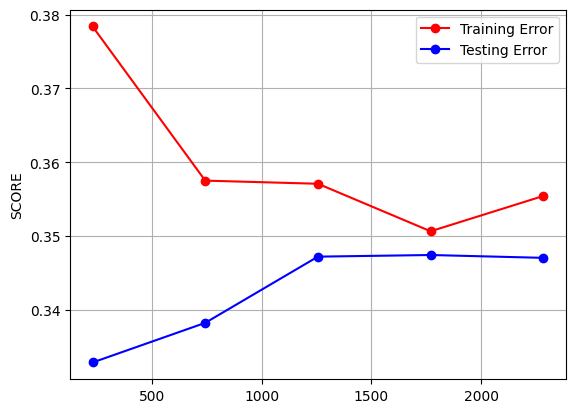

In [ ]:
#Drawing The Learning Curves
from sklearn.linear_model import Lasso
from sklearn.model_selection import learning_curve

alpha = 0.3
lasso = Lasso(alpha=alpha,tol=0.001)
T_S, T_Score, Te_Score = learning_curve(lasso, X_Train, Y_Train, cv=5, scoring='r2')
plt.grid()
plt.ylabel("SCORE")
plt.plot(T_S,np.mean(T_Score,axis=1),'o-', color="r",label="Training Error")
plt.plot(T_S,np.mean(Te_Score,axis=1),'o-', color="b",label="Testing Error")
plt.legend()
plt.show()

In [ ]:
#Doing Cross Validation For The Final Model
lasso = Lasso(alpha=alpha, tol=0.001)
cv_scores = cross_val_score(lasso, X_Train, Y_Train, cv=5, scoring='r2')
print("Cross-validation R^2 scores:", cv_scores)
print("Mean cross-validation R^2 score:", np.mean(cv_scores))
print("\n")
lasso.fit(X_Train, Y_Train)
y_pred_train = lasso.predict(X_Train)
y_pred_val = lasso.predict(X_Validation)
train_r2 = r2_score(Y_Train, y_pred_train)
val_r2 = r2_score(Y_Validation, y_pred_val)
print("Train R^2 Score:", train_r2)
print("Validation R^2 Score:", val_r2)
print("\n")
mse_train = mean_squared_error(Y_Train, y_pred_train)
mse_val = mean_squared_error(Y_Validation, y_pred_val)
print("Mean Square Error For The Training Set:", mse_train)
print("Mean Square Error For The Validation Set:", mse_val)
print("\n")
mae_train = mean_absolute_error(Y_Train, y_pred_train)
mae_val = mean_absolute_error(Y_Validation, y_pred_val)
print("Mean Absolute Error For The Training Set:", mae_train)
print("Mean Absolute Error For The Validation Set:", mae_val)


Cross-validation R^2 scores: [0.32930704 0.37419694 0.37988358 0.28857269 0.3631827 ]
Mean cross-validation R^2 score: 0.34702859125753116


Train R^2 Score: 0.35477710013241304
Validation R^2 Score: 0.35184327831587203


Mean Square Error For The Training Set: 163.31468540619952
Mean Square Error For The Validation Set: 194.7460913849281


Mean Absolute Error For The Training Set: 9.32178364005103
Mean Absolute Error For The Validation Set: 9.803776397690493


In [ ]:
#Dumping The Model
from joblib import load,dump
dump(lasso,"Final_Machine_Learning_Model.joblib")

['Final_Machine_Learning_Model.joblib']

In [ ]:
#Downloading The Library
!pip install --quiet gradio
import gradio as gr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.4 MB/s e

In [ ]:
#Creating Gradio Interface
import gradio as gr
from joblib import load
Options=['African-American','Asian','Black','Black African',
 'Black or African American','Caucasian','Chinese','Han Chinese',
 'Hispanic','Indian','Intermediate','Japanese','Korean','Malay','Other',
 'Other (Black British)','Other Mixed Race','White','other']
Options1=['1.7-2.8','1.7-3.3','2-3','2-3.5','2.5-3.5','3-4']
Option2=['A/A','A/G','G/G']
Option3=["Yes","Not Present"]
Option4=["Yes","Not Present"]
Option5=['1.7-2.8','1.7-3.3','2-3','2-3.5','2.5-3.5','3-4']
Option6=['*1/*1','*1/*11','*1/*13','*1/*14','*1/*2','*1/*3','*1/*5','*1/*6',
 '*2/*2','*2/*3','*3/*3']


input_Module1=gr.Dropdown(label="Race (Reported)",choices=Options)
input_Module5=gr.Dropdown(label='Simvastatin (Zocor)',choices=Option3)
input_Module6=gr.Dropdown(label='Amiodarone (Cordarone)',choices=Option3)
input_Module8=gr.Dropdown(label='VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T',choices=Option2)
input_Module7_0=gr.Dropdown(label='Estimated Target INR Range Based on Indication',choices=Option5)
input_Module9=gr.Dropdown(label='Cyp2C9 genotypes',choices=Option6)


input_Module2=gr.Textbox(label="Age")
input_Module3=gr.Textbox(label="Height (CM)")
input_Module4=gr.Textbox(label="Weight (kg)")
input_Module7=gr.Textbox(label="INR on Reported Therapeutic Dose of Warfarin")

Prediciton_Model=load('/content/Final_Machine_Learning_Model.joblib')
Scaling_Model=load('Scaling_Object.joblib')


Output_Module=gr.Textbox("Regression Output")
def Function(input_Module1,input_Module2,input_Module3,input_Module4,input_Module5,input_Module6,input_Module7,input_Module8,input_Module7_0,input_Module9):
  Dict1={'African-American': 0, 'Asian': 1, 'Black': 2, 'Black African': 3, 'Black or African American': 4, 'Caucasian': 5, 'Chinese': 6, 'Han Chinese': 7, 'Hispanic': 8, 'Indian': 9, 'Intermediate': 10, 'Japanese': 11, 'Korean': 12, 'Malay': 13, 'Other': 14, 'Other (Black British)': 15, 'Other Mixed Race': 16, 'White': 17, 'other': 18}
  Dict2={"Yes":0,"Not Present":1}
  Dict3={'A/A': 0, 'A/G': 1, 'G/G': 2}
  Dict4={'1.7-2.8': 0, '1.7-3.3': 1, '2-3': 2, '2-3.5': 3, '2.5-3.5': 4, '3-4': 5}
  Dict5={'*1/*1': 0, '*1/*11': 1, '*1/*13': 2, '*1/*14': 3, '*1/*2': 4, '*1/*3': 5, '*1/*5': 6, '*1/*6': 7, '*2/*2': 8, '*2/*3': 9, '*3/*3': 10}




  input_Module1=Dict1[input_Module1]
  input_Module5=Dict2[input_Module5]
  input_Module6=Dict2[input_Module6]
  input_Module8=Dict3[input_Module8]
  input_Module7_0=Dict4[input_Module7_0]
  input_Module9=Dict5[input_Module9]

  input_Module2=int(input_Module2)
  input_Module3=int(input_Module3)
  input_Module4=int(input_Module4)
  input_Module7=int(input_Module7)

  DATA=[input_Module1,input_Module2,input_Module3,input_Module4,input_Module5,input_Module6,input_Module7_0,input_Module7,input_Module9,input_Module8]
  DATA=Scaling_Model.transform([DATA])





  return Prediciton_Model.predict(DATA)
gr.Interface(Function, inputs=[input_Module1,input_Module2,input_Module3,input_Module4,input_Module5,input_Module6,input_Module7,input_Module8,input_Module7_0,input_Module9], outputs=Output_Module).launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c72814e7db43bdf6d9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
